In [1]:
import pandas as pd
df = pd.read_csv("student_habits_performance (1).csv")

In [2]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [6]:
df.isna().sum().sum()

np.int64(91)

In [7]:
df = df.dropna()


In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
df.describe(include="object").columns
 

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [11]:
categorial_cols = ['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']
     

In [12]:
for col in categorial_cols:
    print(f"Vale counts for {col}: \n {df[col].value_counts()}")

Vale counts for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Vale counts for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Vale counts for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Vale counts for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Vale counts for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Vale counts for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours_per_day'}>,
        <Axes: title={'center': 'social_media_hours'}>],
       [<Axes: title={'center': 'netflix_hours'}>,
        <Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'exercise_frequency'}>,
        <Axes: title={'center': 'mental_health_rating'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

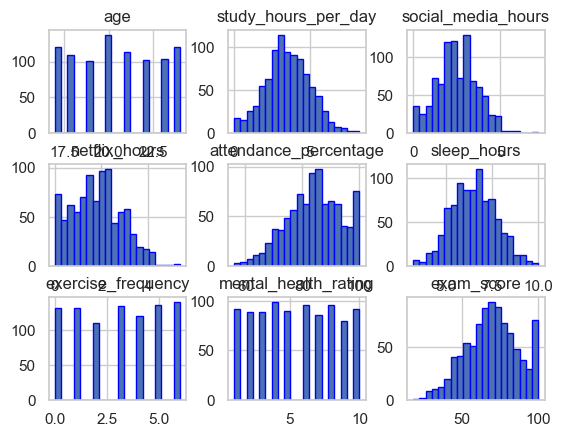

In [13]:
df.hist(bins= 20, edgecolor="blue") 

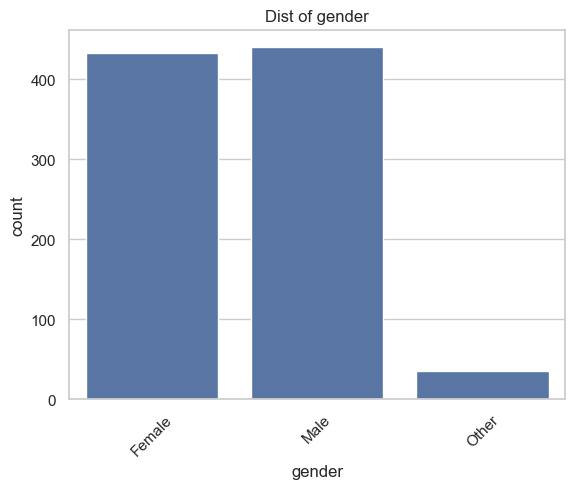

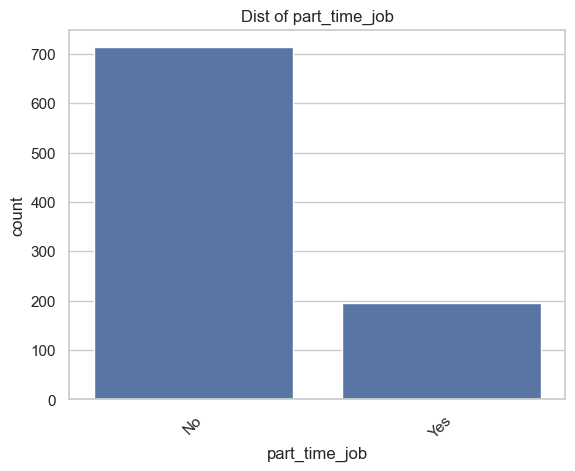

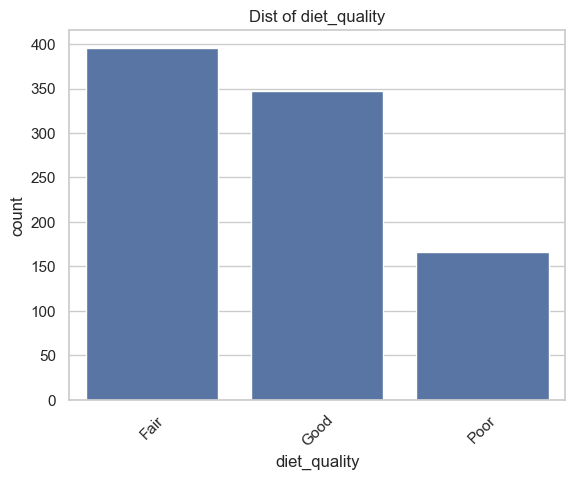

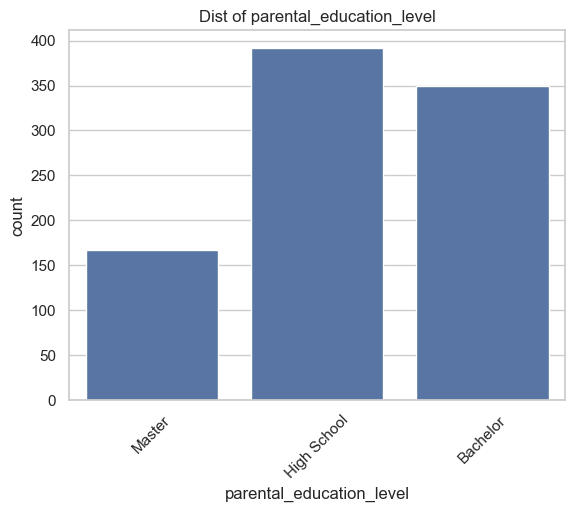

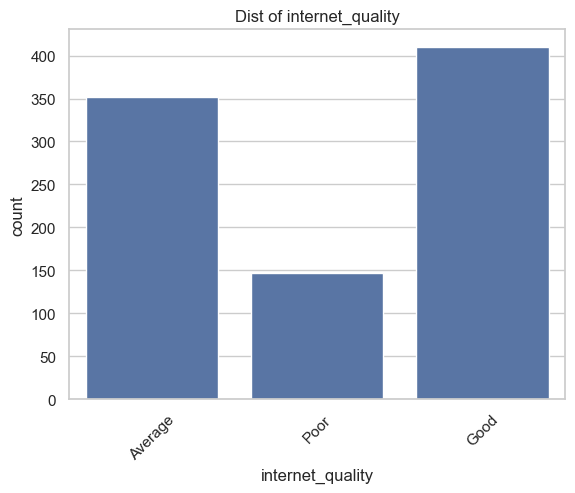

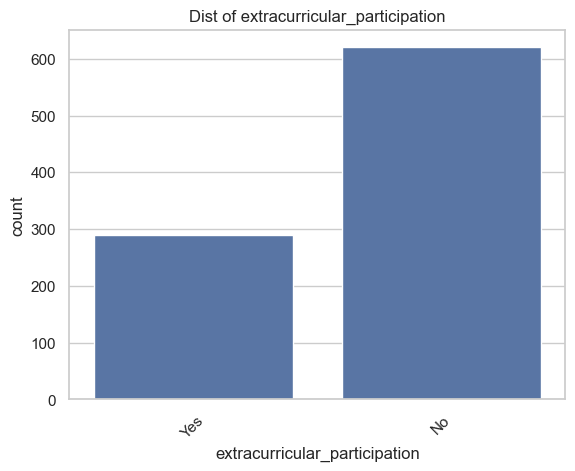

In [14]:
for col in categorial_cols:
    sns.countplot(data =df,x= col)
    plt.title(f"Dist of {col}")
    plt.xticks(rotation = 45)
    plt.show()

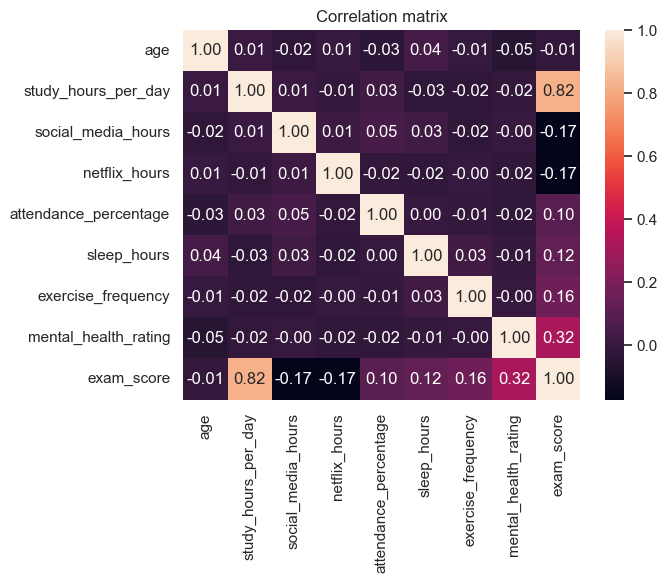

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()


In [16]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

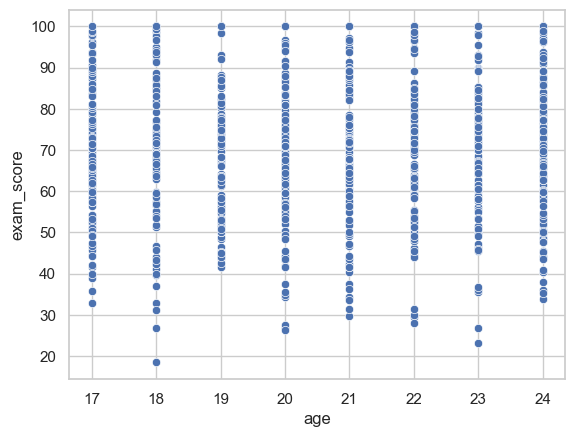

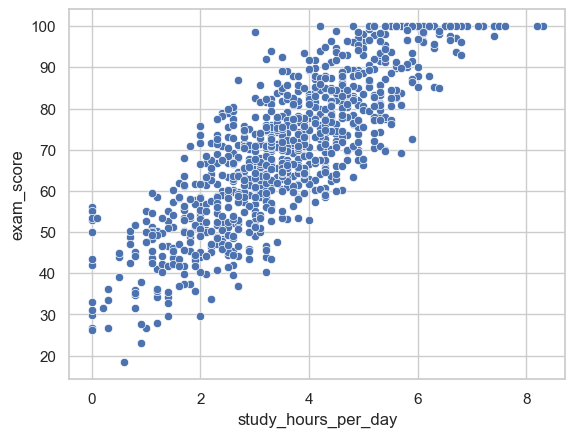

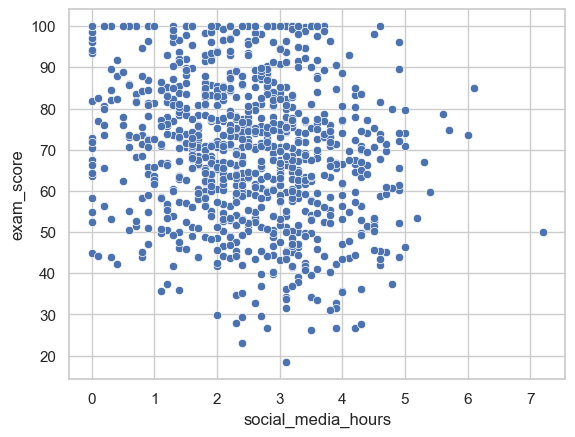

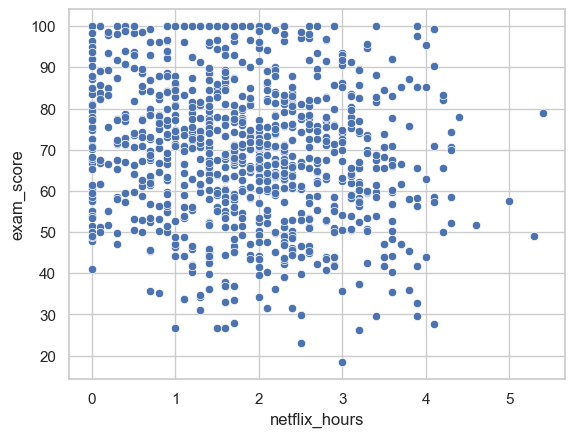

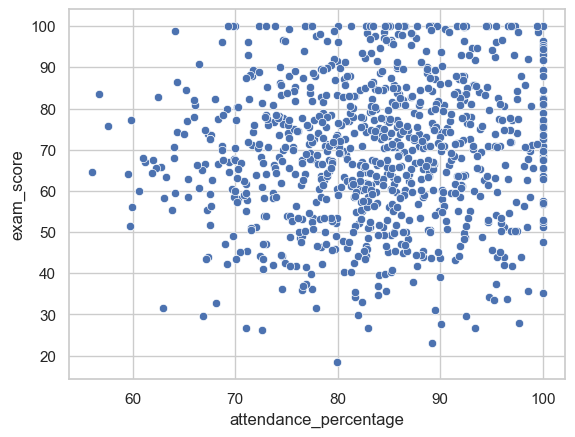

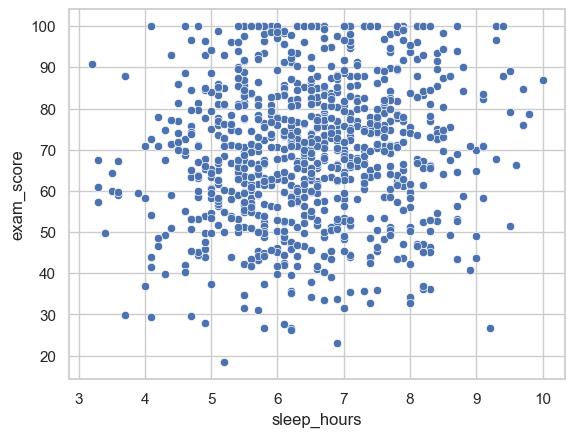

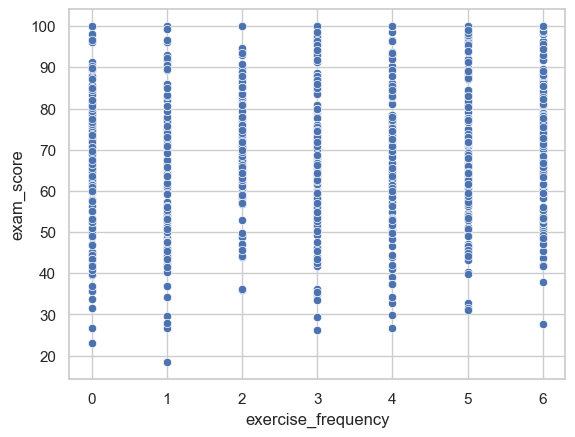

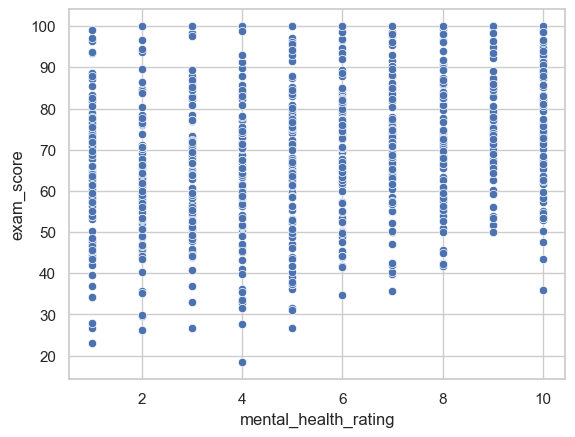

In [17]:
for feature in num_features:
    sns.scatterplot(data= df, x = feature, y = "exam_score")
    plt.show()


In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [19]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [20]:
features = ['study_hours_per_day','attendance_percentage', 'mental_health_rating','sleep_hours','part_time_job']

In [21]:
target = "exam_score"

In [22]:
df_model = df[features + [target]].copy()

In [23]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [24]:
le = LabelEncoder()
df_model['part_time_job'] = le.fit_transform(df_model['part_time_job'])


In [25]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [26]:
X = df_model[features]
y = df_model[target]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [28]:

len(y_test)


182

In [29]:
len(y_train)

727

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [3, 5, 10],
            "min_samples_split": [2, 5, 10]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, 10]
        }
    }
}


In [36]:
best_models= []

In [38]:
for name, config in models.items():
    print(f"Training {name}")

    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_squared_error")
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    best_models.append({
        "name": name,
        "best_params": grid.best_params_,
        "rmse": rmse,
        "r2": r2
    })

Training LinearRegression
Training DecisionTree
Training RandomForest


In [40]:
results_df = pd.DataFrame(best_models)

In [41]:
results_df.sort_values(by="rmse")

,name,best_params,rmse,r2
0,LinearRegression,{},7.186567,0.806812
3,LinearRegression,{},7.186567,0.806812
2,RandomForest,"{'max_depth': 5, 'n_estimators': 50}",7.454787,0.792122
5,RandomForest,"{'max_depth': 5, 'n_estimators': 100}",7.479433,0.790746
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.545562,0.726839
4,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.545562,0.726839


In [42]:
import joblib
best_row = results_df.sort_values(by="rmse").iloc[0]

In [44]:
best_row

name           LinearRegression
best_params                  {}
rmse                   7.186567
r2                     0.806812
Name: 0, dtype: object

In [47]:
best_model_name = best_row["name"]

In [48]:
best_model_name

'LinearRegression'

In [50]:
best_model_config = models[best_model_name]

In [51]:
best_model_config

{'model': LinearRegression(), 'params': {}}

In [52]:
final_model = best_model_config["model"]

In [54]:
final_model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
final_model.predict(X_test)

array([ 39.6867241 ,  57.63384029,  66.54212873,  80.25838196,
        75.58766803,  74.07300984,  84.62669148,  53.22219131,
        57.0472934 ,  74.89289694,  48.17243843,  55.89326092,
        66.5155005 ,  70.19382401,  73.20131605,  74.64630704,
        69.19275373,  55.72437836,  51.19094234,  77.48107335,
        47.41966756,  74.29479694,  94.26716699,  63.58381267,
        60.95454931,  39.79507284,  62.33964812,  57.67033365,
        46.89711801,  40.22731221,  69.14617842,  66.7077738 ,
        85.89629743,  76.60690732,  73.50744843,  77.30359466,
        66.0866954 ,  68.00488232,  71.62634586,  84.17072978,
        77.3074474 ,  57.48846515,  76.68472104,  66.53984381,
        64.13092859,  52.84828921,  82.2417553 ,  69.51599848,
        80.80740576,  60.29610803,  71.42430502,  56.00371918,
        43.50243593, 102.62470515,  65.33003352,  71.57182983,
        57.77560058,  58.44760136,  35.05873964,  67.50594954,
        74.92637312,  60.05075545,  62.39081909,  98.48

In [56]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [58]:
joblib.load("final_model.pkl").predict(X_test)

array([ 39.6867241 ,  57.63384029,  66.54212873,  80.25838196,
        75.58766803,  74.07300984,  84.62669148,  53.22219131,
        57.0472934 ,  74.89289694,  48.17243843,  55.89326092,
        66.5155005 ,  70.19382401,  73.20131605,  74.64630704,
        69.19275373,  55.72437836,  51.19094234,  77.48107335,
        47.41966756,  74.29479694,  94.26716699,  63.58381267,
        60.95454931,  39.79507284,  62.33964812,  57.67033365,
        46.89711801,  40.22731221,  69.14617842,  66.7077738 ,
        85.89629743,  76.60690732,  73.50744843,  77.30359466,
        66.0866954 ,  68.00488232,  71.62634586,  84.17072978,
        77.3074474 ,  57.48846515,  76.68472104,  66.53984381,
        64.13092859,  52.84828921,  82.2417553 ,  69.51599848,
        80.80740576,  60.29610803,  71.42430502,  56.00371918,
        43.50243593, 102.62470515,  65.33003352,  71.57182983,
        57.77560058,  58.44760136,  35.05873964,  67.50594954,
        74.92637312,  60.05075545,  62.39081909,  98.48